<a href="https://colab.research.google.com/github/bharaniakella/Akellian_DL/blob/main/ann_reg_vary_slope_with_user_defined_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt

In [166]:
def create_data(m):
  N=50
  x=torch.randn(N,1)
  y=m*x+torch.randn(N,1)/2
  return x,y

In [167]:
def ann_reg(x,y):
  ann_reg=nn.Sequential(
  nn.Linear(1,1),
  nn.ReLU(),
  nn.Linear(1,1)
  )

  lr=0.05
  loss_fun=nn.MSELoss()
  optimizer=torch.optim.SGD(ann_reg.parameters(),lr)

  num_epoch=500
  losses=torch.zeros(num_epoch)

  for epochi in range(num_epoch):

    yhat=ann_reg(x)

    loss=loss_fun(yhat,y)
    losses[epochi]=loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions=ann_reg(x)

  return predictions, losses


In [173]:
slopes=np.linspace(-2,2,21)
exp=50

results=np.zeros((len(slopes),exp,2))

for slopei in range(len(slopes)):
  for expi in range(exp):
    x,y=create_data(slopei)
    predictions,losses=ann_reg(x,y)

    results[slopei,expi,0]=losses[-1]
    results[slopei,expi,1]=np.corrcoef(y.T,predictions.detach().T)[0,1]

results[np.isnan(results)]=0


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


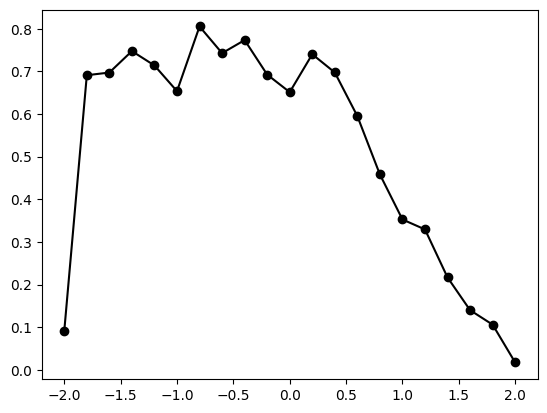

In [190]:
plt.plot(slopes,np.mean(results[:,:,1],axis=1),'ko-')
plt.show()